Here, I will implement the Eigenface algorithm, which involves performing PCA on images of human faces.

Reference: M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). Journal of Cognitive Neuroscience. 3 (1): 71–86

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA


# Loading Dataset

In [2]:
lfw_people = fetch_lfw_people()

# introspect the images arrays to find the shapes
n_samples, h, w = lfw_people.images.shape
 
# Instead of providing 2D data, X has data already in the form  of a vector that
# is required in this approach.
X = lfw_people.data
n_features = X.shape[1]
 
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("There are  %d" % n_samples + " of faces")
print("The shape of dataset: (%d, %d, %d)" % lfw_people.images.shape)


Total dataset size:
There are  13233 of faces
The shape of dataset: (13233, 62, 47)


# EDA of dataset

In [3]:
# resize and padding with zero
m = 64         
n = 64 

face_imgs = np.zeros((n_samples,64,64))
face_imgs[:lfw_people.images.shape[0],:lfw_people.images.shape[1],:lfw_people.images.shape[2]] = lfw_people.images

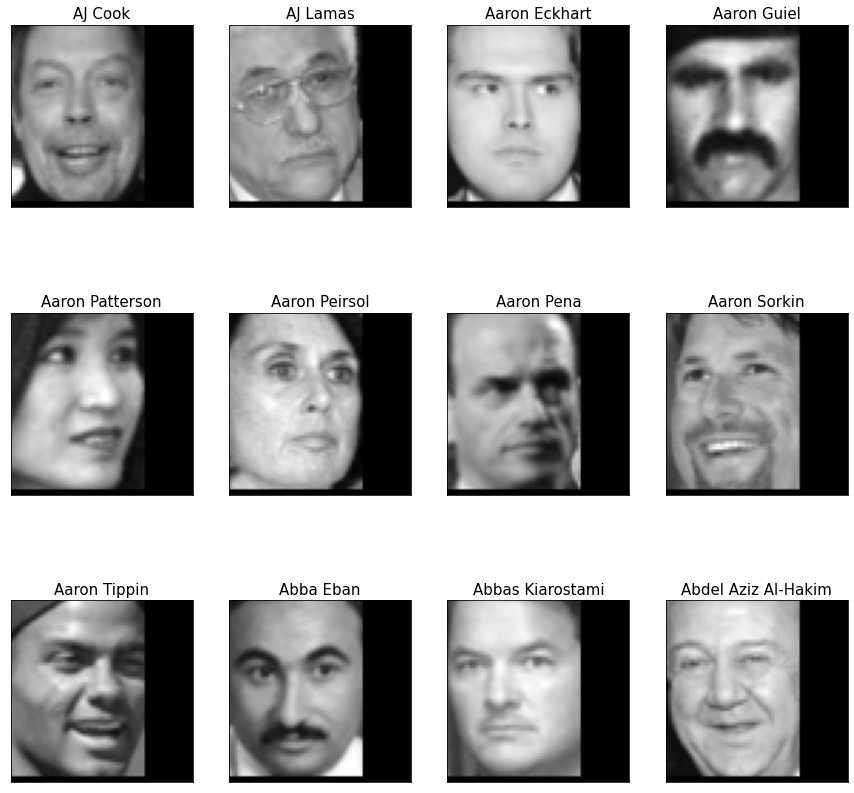

In [4]:
fig, axs = plt.subplots(3,4, figsize = (15,15))

for face_img, face_name, ax in zip(face_imgs,target_names,axs.flatten()):
    ax.imshow(face_img.reshape((m, n)), cmap = plt.cm.gray)
    ax.set_title(face_name, fontsize = 15)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Visualize the "mean face"
Take the mean face image across the dataset and show it below. It shows all the genereal characteristics of a face (eyes noses mouth facial structure)

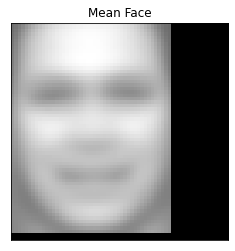

In [5]:
mean_face_plot = plt.imshow(face_imgs.mean(axis=0),cmap=plt.get_cmap('gray'))
mean_face_plot.axes.set_title(f'Mean Face')
mean_face_plot.axes.get_xaxis().set_visible(False)
mean_face_plot.axes.get_yaxis().set_visible(False)
plt.show()

# Perform PCA on face data

In [6]:
face_imgs_vec  = face_imgs.reshape(face_imgs.shape[0],face_imgs.shape[1]*face_imgs.shape[2])

print(f'Reshaped face images have shape={face_imgs_vec.shape}')

Reshaped face images have shape=(13233, 4096)


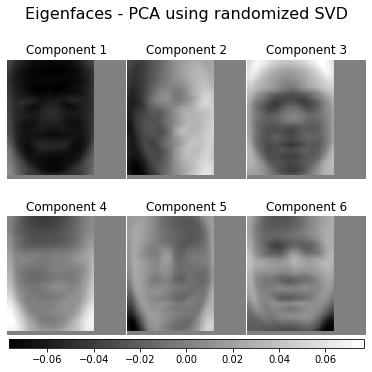

In [7]:
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)

pca_estimator = PCA(
    n_components=n_components, svd_solver="randomized", whiten=True
)
pca_estimator.fit_transform(face_imgs_vec)

fig, axs = plt.subplots(n_row,n_col, figsize = (5,5),constrained_layout=True)
fig.suptitle("Eigenfaces - PCA using randomized SVD", size=16)
fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)

i = 1
for ax, vec in zip(axs.flat, pca_estimator.components_[:n_components]):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.set_title("Component " + str(i))
        ax.axis("off")
        i += 1

fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
plt.show()

In [9]:
# Compute the components and projected faces
pca = PCA(n_components)
components = pca.fit_transform(face_imgs_vec)
projected = pca.inverse_transform(components)

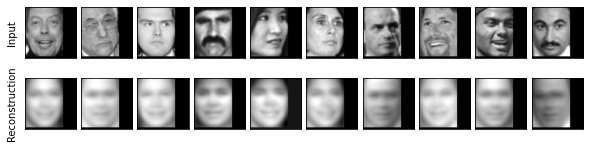

In [10]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(face_imgs_vec[i].reshape(m, n), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(m, n), cmap='binary_r')
    
ax[0, 0].set_ylabel('Input')
ax[1, 0].set_ylabel('Reconstruction');

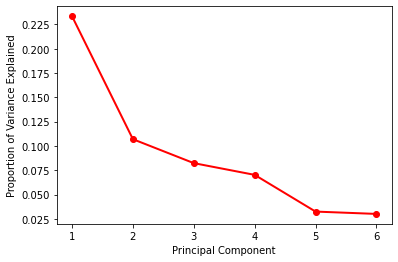

In [11]:
PC_values = np.arange(pca_estimator.n_components_) + 1
plt.plot(PC_values, pca_estimator.explained_variance_ratio_, 'ro-', linewidth=2)

plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Text(0, 0.5, 'cumulative explained variance')

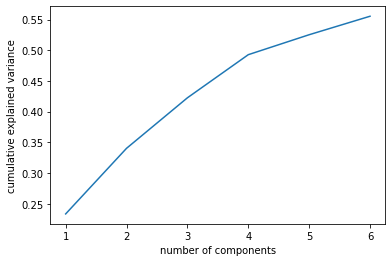

In [12]:
plt.plot(np.arange(pca_estimator.n_components_) + 1, np.cumsum(pca_estimator.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')